# CrazyTaxi - Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%%time
df = pd.read_csv(r'C:\Users\nishi\Desktop\EECS 731 - Data Science\Project\2017_Green_Taxi_Trip_Data.csv', parse_dates=['lpep_pickup_datetime','lpep_dropoff_datetime'], infer_datetime_format=True)

Wall time: 8min 24s


# Data Cleaning and Preparation

In [3]:
df.shape

(2293365, 19)

In [4]:
# This means there are no duplicate records
df.drop_duplicates()
df.shape

(2293365, 19)

In [5]:
df.dtypes

VendorID                          int64
lpep_pickup_datetime     datetime64[ns]
lpep_dropoff_datetime    datetime64[ns]
store_and_fwd_flag               object
RatecodeID                        int64
PULocationID                      int64
DOLocationID                      int64
passenger_count                   int64
trip_distance                   float64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
ehail_fee                       float64
improvement_surcharge           float64
total_amount                    float64
payment_type                      int64
trip_type                       float64
dtype: object

In [6]:
# Checking for NULL values

df.isnull().sum(axis=0)

VendorID                       0
lpep_pickup_datetime           0
lpep_dropoff_datetime          0
store_and_fwd_flag             0
RatecodeID                     0
PULocationID                   0
DOLocationID                   0
passenger_count                0
trip_distance                  0
fare_amount                    0
extra                          0
mta_tax                        0
tip_amount                     0
tolls_amount                   0
ehail_fee                2293365
improvement_surcharge          0
total_amount                   0
payment_type                   0
trip_type                     27
dtype: int64

In [7]:
# Dropping unnecessary columns
df = df.drop(['ehail_fee','store_and_fwd_flag','VendorID'], axis=1)

In [8]:
df.head()

,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type
0,2017-12-31 23:55:09,2017-12-31 23:59:14,1,17,61,1,1.1,5.5,0.5,0.5,0.00,0.0,0.3,6.80,2,1.0
1,2017-12-31 23:30:36,2017-12-31 23:37:20,1,61,49,1,1.1,6.5,0.5,0.5,0.00,0.0,0.3,7.80,2,1.0
2,2017-12-31 23:02:26,2017-12-31 23:19:37,1,228,188,1,4.1,15.5,0.5,0.5,3.35,0.0,0.3,20.15,1,1.0
3,2017-12-31 23:12:24,2017-12-31 23:16:55,1,228,26,1,0.8,5.0,0.5,0.5,0.00,0.0,0.3,6.30,2,1.0
4,2017-12-31 23:53:11,2017-12-31 23:55:40,1,225,225,1,0.5,4.0,0.5,0.5,0.00,0.0,0.3,5.30,2,1.0


In [9]:
print("Records with fare_amount 0 :" + str(df.loc[df['fare_amount'] == 0].shape))
print("minimum pickup date " + str(min(df['lpep_pickup_datetime'])))
print("maximum pickup date " + str(max(df['lpep_pickup_datetime'])))
print("minimum dropoff date " + str(min(df['lpep_dropoff_datetime'])))
print("maximum dropoff date " + str(max(df['lpep_dropoff_datetime'])))
print("Minimun time taken for the trip " + str(min(df['lpep_dropoff_datetime']-df['lpep_pickup_datetime'])))
print("Maximum time taken for the trip " + str(max(df['lpep_dropoff_datetime']-df['lpep_pickup_datetime'])))

Records with fare_amount 0 :(20704, 16)
minimum pickup date 2017-01-01 00:00:27
maximum pickup date 2017-12-31 23:59:50
minimum dropoff date 2017-01-01 00:03:16
maximum dropoff date 2018-01-01 00:33:59
Minimun time taken for the trip -2 days +08:03:55
Maximum time taken for the trip 1 days 15:19:20


In [10]:
from datetime import timedelta
print("dropoff time < 1s :" + str(df[df['lpep_dropoff_datetime']-df['lpep_pickup_datetime'] < timedelta(seconds=1)].shape))
df[df['lpep_dropoff_datetime']-df['lpep_pickup_datetime'] < timedelta(seconds=1)].head()

dropoff time < 1s :(4340, 16)


,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type
830,2017-12-31 20:44:28,2017-12-31 20:44:28,1,42,264,5,0.0,9.0,0.5,0.5,0.0,0.0,0.3,10.3,2,1.0
2163,2017-12-31 16:35:31,2017-12-31 16:35:31,1,167,264,2,0.0,2.5,0.0,0.5,0.0,0.0,0.3,3.3,2,1.0
3090,2017-12-31 13:59:41,2017-12-31 13:59:41,1,116,264,1,0.0,18.5,0.0,0.5,0.0,0.0,0.3,19.3,2,1.0
3123,2017-12-31 13:27:38,2017-12-31 13:27:38,1,242,264,1,0.0,10.5,0.0,0.5,0.0,0.0,0.3,11.3,2,1.0
4450,2017-12-31 10:00:42,2017-12-31 10:00:42,1,41,264,1,0.0,13.5,0.0,0.5,0.0,0.0,0.3,14.3,2,1.0


In [11]:
print("Min Passanger :" + str(min(df['passenger_count'])))
print("Max Passanger :" + str(max(df['passenger_count'])))

Min Passanger :0
Max Passanger :9


In [12]:
print("Min Trip Distance :" + str(min(df['trip_distance'])))
print("Max Trip Distance :" + str(max(df['trip_distance'])))

Min Trip Distance :0.0
Max Trip Distance :640.0


In [13]:
print("Min fare_amount :" + str(min(df['fare_amount'])))
print("Max fare_amount :" + str(max(df['fare_amount'])))

Min fare_amount :0.0
Max fare_amount :6003.5


In [14]:
print("Min extra :" + str(min(df['extra'])))
print("Max extra :" + str(max(df['extra'])))
print("Extra < 0" + str(df[df['extra'] < 0].shape))

Min extra :-0.67
Max extra :30.0
Extra < 0(2, 16)


In [15]:
print("Min mta_tax :" + str(min(df['mta_tax'])))
print("Max mta_tax :" + str(max(df['mta_tax'])))
print("mta_tax < 0" + str(df[df['mta_tax'] < 0].shape))

Min mta_tax :0.0
Max mta_tax :0.83
mta_tax < 0(0, 16)


In [16]:
print("Min tip_amount :" + str(min(df['tip_amount'])))
print("Max tip_amount :" + str(max(df['tip_amount'])))
print("tip_amount < 0" + str(df[df['tip_amount'] < 0].shape))

Min tip_amount :0.0
Max tip_amount :449.56
tip_amount < 0(0, 16)


In [17]:
print("Min tolls_amount :" + str(min(df['tolls_amount'])))
print("Max tolls_amount :" + str(max(df['tolls_amount'])))
df[df['tolls_amount'] > 500].head(10)

Min tolls_amount :0.0
Max tolls_amount :7999.92


,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type
870084,2017-07-23 00:58:04,2017-07-23 00:58:04,1,41,264,1,0.0,6.50,0.5,0.5,0.0,850.00,0.3,857.80,2,1.0
1659616,2017-03-28 15:32:05,2017-03-28 15:34:40,5,199,199,1,0.0,999.99,0.0,0.0,0.0,7999.92,0.0,8999.91,2,2.0
1883979,2017-02-26 21:57:49,2017-02-26 21:58:40,1,75,75,1,3.1,2.50,0.5,0.5,0.0,795.54,0.3,799.34,4,1.0
1901263,2017-02-24 21:23:51,2017-02-24 21:26:16,1,74,42,1,0.3,3.50,0.5,0.5,0.0,795.54,0.3,800.34,4,1.0
1919026,2017-02-22 16:25:27,2017-02-22 16:32:43,1,159,168,1,1.3,7.00,1.0,0.5,0.0,795.54,0.3,804.34,4,1.0
1923362,2017-02-21 20:42:55,2017-02-21 20:47:49,1,159,74,1,1.1,6.00,0.5,0.5,0.0,795.54,0.3,802.84,2,1.0
1926374,2017-02-21 11:28:16,2017-02-21 12:06:06,1,255,186,2,4.8,25.00,0.0,0.5,0.0,605.55,0.3,631.35,4,1.0
1929013,2017-02-20 21:21:14,2017-02-20 21:28:35,1,74,42,1,1.4,7.50,0.5,0.5,0.0,795.54,0.3,804.34,4,1.0
1940746,2017-02-19 02:52:02,2017-02-19 03:17:07,1,41,244,1,4.1,20.50,0.5,0.5,0.0,1591.08,0.3,1612.88,2,1.0
2014041,2017-02-09 22:55:55,2017-02-09 23:17:16,1,255,261,1,8.2,26.00,0.5,0.5,0.0,554.09,0.3,581.39,2,1.0


In [18]:
print("Min improvement_surcharge :" + str(min(df['improvement_surcharge'])))
print("Max improvement_surcharge :" + str(max(df['improvement_surcharge'])))
print("improvement_surcharge < 0" + str(df[df['improvement_surcharge'] < 0].shape))

Min improvement_surcharge :0.0
Max improvement_surcharge :0.3
improvement_surcharge < 0(0, 16)


In [19]:
print("Min total_amount :" + str(min(df['total_amount'])))
print("Max total_amount :" + str(max(df['total_amount'])))
print("total_amount > 500" + str(df[df['total_amount'] > 500].shape))
#df[df['total_amount'] > 500]

Min total_amount :0.0
Max total_amount :8999.91
total_amount > 500(19, 16)


In [20]:
# Records where totals does not sum up
# Create a totals column manually ?
df[df['total_amount'] != df['fare_amount'] + df['extra'] + df['mta_tax'] + df['tip_amount'] + df['tolls_amount'] + df['improvement_surcharge']].head()

,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type
2,2017-12-31 23:02:26,2017-12-31 23:19:37,1,228,188,1,4.1,15.5,0.5,0.5,3.35,0.0,0.3,20.15,1,1.0
38,2017-12-31 23:58:16,2018-01-01 00:15:22,1,80,125,1,6.1,20.0,0.5,0.5,6.35,0.0,0.3,27.65,1,1.0
49,2017-12-31 23:35:15,2017-12-31 23:46:33,1,225,61,1,1.8,9.5,0.5,0.5,2.15,0.0,0.3,12.95,1,1.0
60,2017-12-31 23:03:06,2017-12-31 23:08:11,1,75,237,2,1.5,6.5,0.5,0.5,1.55,0.0,0.3,9.35,1,1.0
94,2017-12-31 23:56:40,2018-01-01 00:03:19,1,74,74,1,0.9,6.0,0.5,0.5,1.80,0.0,0.3,9.10,1,1.0


In [21]:
print("0 trip distance but different locations"+str(df[(df['trip_distance'] == 0) & (df['PULocationID'] != df['DOLocationID'])].shape))
df[(df['trip_distance'] == 0) & (df['PULocationID'] != df['DOLocationID'])].head()

0 trip distance but different locations(7213, 16)


,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type
830,2017-12-31 20:44:28,2017-12-31 20:44:28,1,42,264,5,0.0,9.0,0.5,0.5,0.00,0.0,0.3,10.30,2,1.0
1168,2017-12-31 21:04:44,2017-12-31 21:18:57,1,61,25,1,0.0,9.5,0.5,0.5,1.00,0.0,0.3,11.80,1,1.0
1989,2017-12-31 17:44:58,2017-12-31 17:58:53,1,97,181,1,0.0,9.0,0.0,0.5,1.95,0.0,0.3,11.75,1,1.0
1990,2017-12-31 17:10:18,2017-12-31 17:17:24,1,33,40,1,0.0,6.0,0.0,0.5,1.35,0.0,0.3,8.15,1,1.0
2163,2017-12-31 16:35:31,2017-12-31 16:35:31,1,167,264,2,0.0,2.5,0.0,0.5,0.00,0.0,0.3,3.30,2,1.0


## Dropping rows summary

negative drop off time
passenger_count <= 0
trip_distance < 0
negative extra
tolls_amount > 500
total_custom <= 0
fare_amount <= 0

## Dropping Columns summary

ehail_fee  
store_and_fwd_flag  
VendorID  

## New Columns Summary  

month  
trip_duration  
day_of_travel
total_custom

In [22]:
df_new = df
df_new.shape

(2293365, 16)

In [23]:
# Dropping outliers
df_new = df[df['lpep_dropoff_datetime']-df['lpep_pickup_datetime'] >= timedelta(seconds=1)]
df_new = df_new[df_new['passenger_count'] > 0]
df_new = df_new[df_new['trip_distance'] > 0]
df_new = df_new[df_new['extra'] >= 0]
df_new = df_new[df_new['tolls_amount'] < 500]

In [24]:
# Creating a new columns
df_new['trip_duration'] = df_new['lpep_dropoff_datetime']-df_new['lpep_pickup_datetime']
df_new['trip_duration'] = df_new['trip_duration'].dt.total_seconds() / 60
df_new['month'] = df_new['lpep_pickup_datetime'].dt.month
df_new['day_of_travel'] = df_new['lpep_pickup_datetime'].dt.day
df_new['total_custom'] = df_new['fare_amount'] + df_new['extra'] + df_new['mta_tax'] + df_new['tip_amount'] + df_new['tolls_amount'] + df_new['improvement_surcharge']

In [25]:
df_new = df_new[df_new['total_custom'] > 0]
df_new = df_new[df_new['fare_amount'] > 0]
# df_new = df_new[(df_new['payment_type'] < 3) & df_new['payment_type'] > 0 ]
df_new.shape

(2249712, 20)

# Exploratory Data Analysis

In [26]:
#descriptive statistics summary
df_new['fare_amount'].describe()

count    2.249712e+06
mean     1.151746e+01
std      9.493112e+00
min      1.000000e-02
25%      6.000000e+00
50%      9.000000e+00
75%      1.400000e+01
max      6.003500e+03
Name: fare_amount, dtype: float64

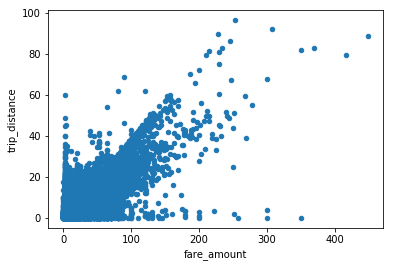

In [27]:
df1 = df_new[(df_new['fare_amount'] < 500) & (df_new['trip_distance'] < 100)]
data = pd.concat([df1['fare_amount'], df1['trip_distance']], axis=1)
data.plot.scatter(x='fare_amount', y='trip_distance')

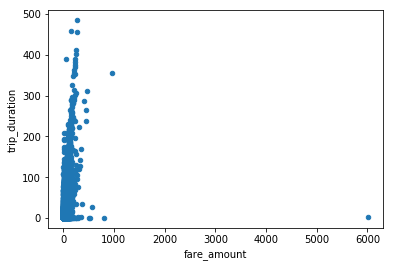

In [28]:
df1 = df_new[(df_new['trip_duration'] > 0) & (df_new['trip_duration'] < 500)]
data = pd.concat([df1['fare_amount'], df1['trip_duration']], axis=1)
data.plot.scatter(x='fare_amount', y='trip_duration');

# Clearly a linear relationship between trip_distance and fare_amount
# remove the outliers with mins > 500

### fare_amount vs month

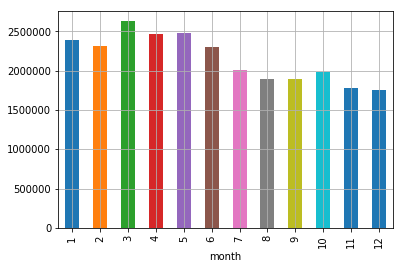

In [29]:
ax = df_new.groupby('month')['fare_amount'].sum().plot.bar(grid=True)

### Top 20 Pickup Locations

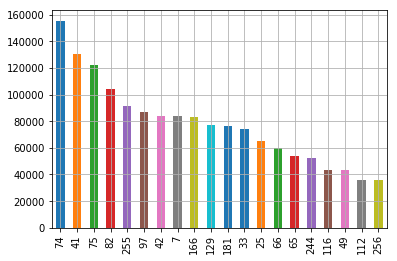

In [30]:
(pd.value_counts(df_new['PULocationID'])).nlargest(20).plot.bar(grid=True)

### Top 20 Dropoff Locations

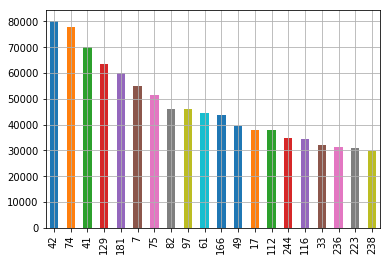

In [31]:
(pd.value_counts(df_new['DOLocationID'])).nlargest(20).plot.bar(grid=True)

### Correlation Matrix

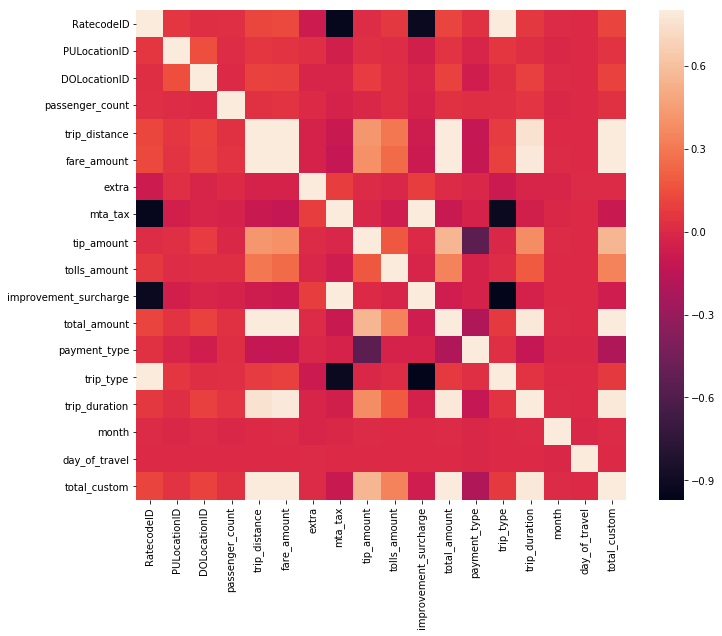

In [32]:
corrmat = df_new.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);